## <center>SOCIAL GRADIENT OF HEALTH</center>
<center>COMP20008 - 2018 - SM2 - Project Phase 3-A</center>

## Question

Do people who are socio-economically disadvantaged (i.e coming from a background of poverty and limited opportunity) have a high health risk factor?

### Import Required Python Libraries

In [1]:
#importing libraries .... 
import pandas as pd
import numpy as np

#importing matplotlib to allow plotting 
import matplotlib.pyplot as plt

#importing sklearn libraries to accommodate preprocessing of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#importing scipy libraries to allow clustering and visualisation of data
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

#importing seaborn for making statistical graphics
import seaborn as sns

#importing sklearn to help with data prediction 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Helper Functions

In [2]:
#helper function to plot VAT heatmap

def VAT(R):
          
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I

def my_entropy(probs):
    return -probs.dot(np.log2(probs))
def mutual_info(X,Y):
    
    df = pd.DataFrame.from_dict({'X' : X,  'Y' :Y})
    Hx = my_entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = my_entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    
    counts = df.groupby(["X","Y"]).size()
    probs = counts/ counts.values.sum()
    H_xy = my_entropy(probs)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy)  
    return NMI

### Load the Data 

In [3]:
#loading the data into dataframe objects
df1 =  pd.read_csv("riskfactor.csv" ,low_memory=False, encoding = 'ISO-8859-1')
df2 = pd.read_csv("socioeconomic_score.csv" ,low_memory=False, encoding = 'ISO-8859-1')
df3 = pd.read_csv("poverty.csv" ,low_memory=False, encoding = 'ISO-8859-1')
df4 = pd.read_csv("diseases.csv" ,low_memory=False, encoding = 'ISO-8859-1')
df5 = pd.read_csv("unemployment.csv" ,low_memory=False, encoding = 'ISO-8859-1')

### Data Preprocessing


In [4]:
#renaming columns of the dataframes
df1.columns = ['Statistical Area Level 2 Code', 'Smokers - Rate per 100', 'Obese - Rate per 100', 'Alcohol Consumption - Rate per 100']
df2.columns = ['Score', 'Statistical Area Level 2 Code']
df3.columns = ['Median Disposable Income - Weekly', 'Poverty Rate (%)', 'Statistical Area Level 2 Code']
df4.columns = ['Mental and Behavioural Problems - Rate per 100', 'Statistical Area Level 2 Code']
df5.columns = ['Statistical Area Level 2 Code', 'Labour Force - Unemployment Rate (%)']

### Data Integration

In [36]:
#merging dataframes
merge1 = pd.merge(df1, df2)
merge2 = pd.merge(merge1, df3)
merge3 = pd.merge(merge2, df4)
finalmerge = pd.merge(merge3, df5)

### Data Preprocessing 

In [6]:
#removing rows that contain any nan/missing values to get consistent data 
finalmerge = finalmerge.dropna(how='any',axis=0)

### Data Transformation 

In [7]:
data = finalmerge.loc[:, finalmerge.columns != 'Statistical Area Level 2 Code'].values.astype(float)
area = finalmerge['Statistical Area Level 2 Code']

#normalising data to have 0 mean and unit variance
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data)

### Pearson Correlation

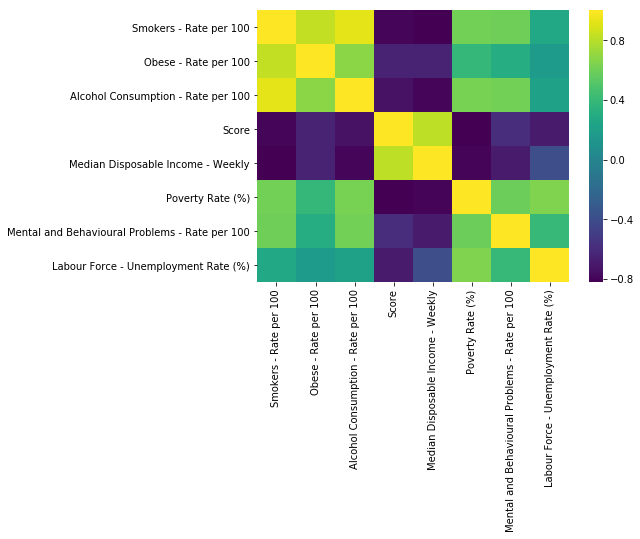

In [8]:
#using Pearson Correlation to assess degree of linear correlation between two features 

#setting the figure size
plt.rcParams["figure.figsize"] = (7, 5)

#making a list to store the column names by iterating over the columns
columns_list = []
cols = finalmerge.loc[:, finalmerge.columns != 'Statistical Area Level 2 Code']
for i in cols:
    columns_list.append(i)

#making a temporary df
#calculating a correlation matrix that represents the correlation between every pair of attributes
temp_df = pd.DataFrame(scaled_data)
corr = temp_df.corr()

#plotting the heatmap for the calculated correlation matrix to visualise the correlation 
#enter argument (annot=True, fmt=".2f") to see actual correlation values
ax = sns.heatmap(corr, cmap='viridis')    
ax.set_xticklabels(columns_list)
plt.xticks(rotation=90)
ax.set_yticklabels(columns_list)
plt.yticks(rotation=0)
plt.show()

### Visualisation - Scatter Plots

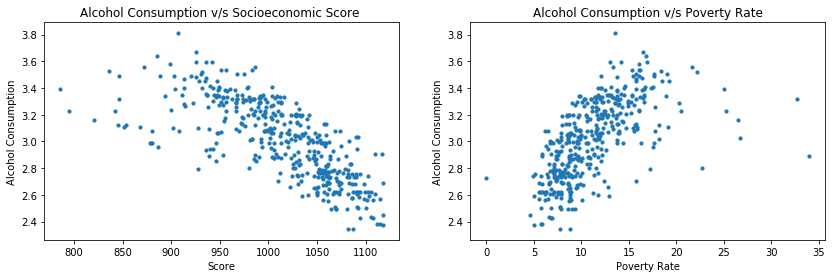

In [9]:
#setting the figure size
fig = plt.figure(figsize=(14,4))

#scatter plot of socioeconomic score against alcohol consumption to show the relationship between the two attributes
plt.subplot(1, 2, 1)
plt.title("Alcohol Consumption v/s Socioeconomic Score ", size=12)
plt.scatter(finalmerge['Score'], finalmerge['Alcohol Consumption - Rate per 100'], s=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Score', size=10)
plt.ylabel('Alcohol Consumption', size=10)

#scatter plot of poverty rate against alcohol consumption to show the relationship between the two attributes
plt.subplot(1, 2, 2)
plt.title("Alcohol Consumption v/s Poverty Rate", size=12)
plt.scatter(finalmerge['Poverty Rate (%)'], finalmerge['Alcohol Consumption - Rate per 100'], s=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Poverty Rate', size=10)
plt.ylabel('Alcohol Consumption', size=10)

plt.show()

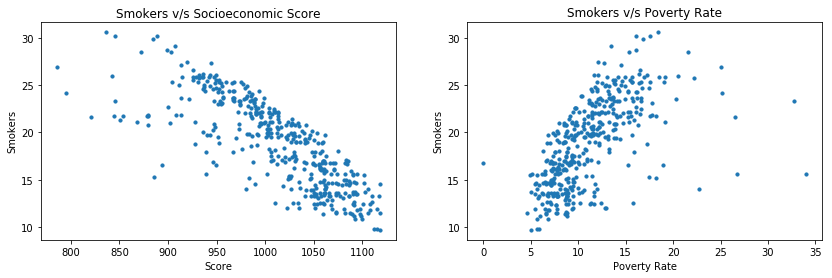

In [10]:
#setting the figure size
fig = plt.figure(figsize=(14,4))

#scatter plot of socioeconomic score against smokers to show the relationship between the two attributes
plt.subplot(1, 2, 1)
plt.title("Smokers v/s Socioeconomic Score", size=12)
plt.scatter(finalmerge['Score'], finalmerge['Smokers - Rate per 100'], s=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Score', size=10)
plt.ylabel('Smokers', size=10)

#scatter plot of poverty rate against smokers to show the relationship between the two attributes
plt.subplot(1, 2, 2)
plt.title("Smokers v/s Poverty Rate", size=12)
plt.scatter(finalmerge['Poverty Rate (%)'], finalmerge['Smokers - Rate per 100'], s=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Poverty Rate', size=10)
plt.ylabel('Smokers', size=10)

plt.show()

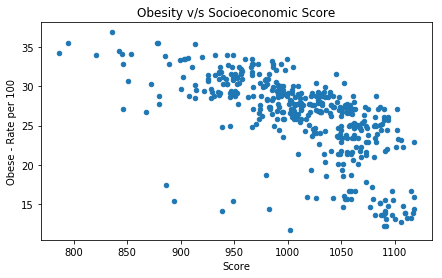

In [11]:
#setting the figure size
plt.rcParams["figure.figsize"] = (7, 4)

#scatter plot of socioeconomic score against obesity to show the relationship between the two attributes
finalmerge.plot.scatter('Score', 'Obese - Rate per 100')
plt.ylabel('Obese - Rate per 100')
plt.title("Obesity v/s Socioeconomic Score", size=12)
plt.show()

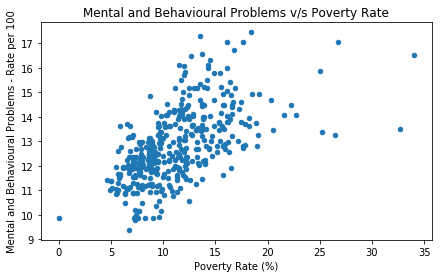

In [12]:
#setting the figure size
plt.rcParams["figure.figsize"] = (7, 4)

#scatter plot of poverty rate against mental and behavioural problems to show the relationship between the two attributes
finalmerge.plot.scatter('Poverty Rate (%)', 'Mental and Behavioural Problems - Rate per 100')
plt.ylabel('Mental and Behavioural Problems - Rate per 100')
plt.title("Mental and Behavioural Problems v/s Poverty Rate", size=12)
plt.show()

### Hierarchical Clustering

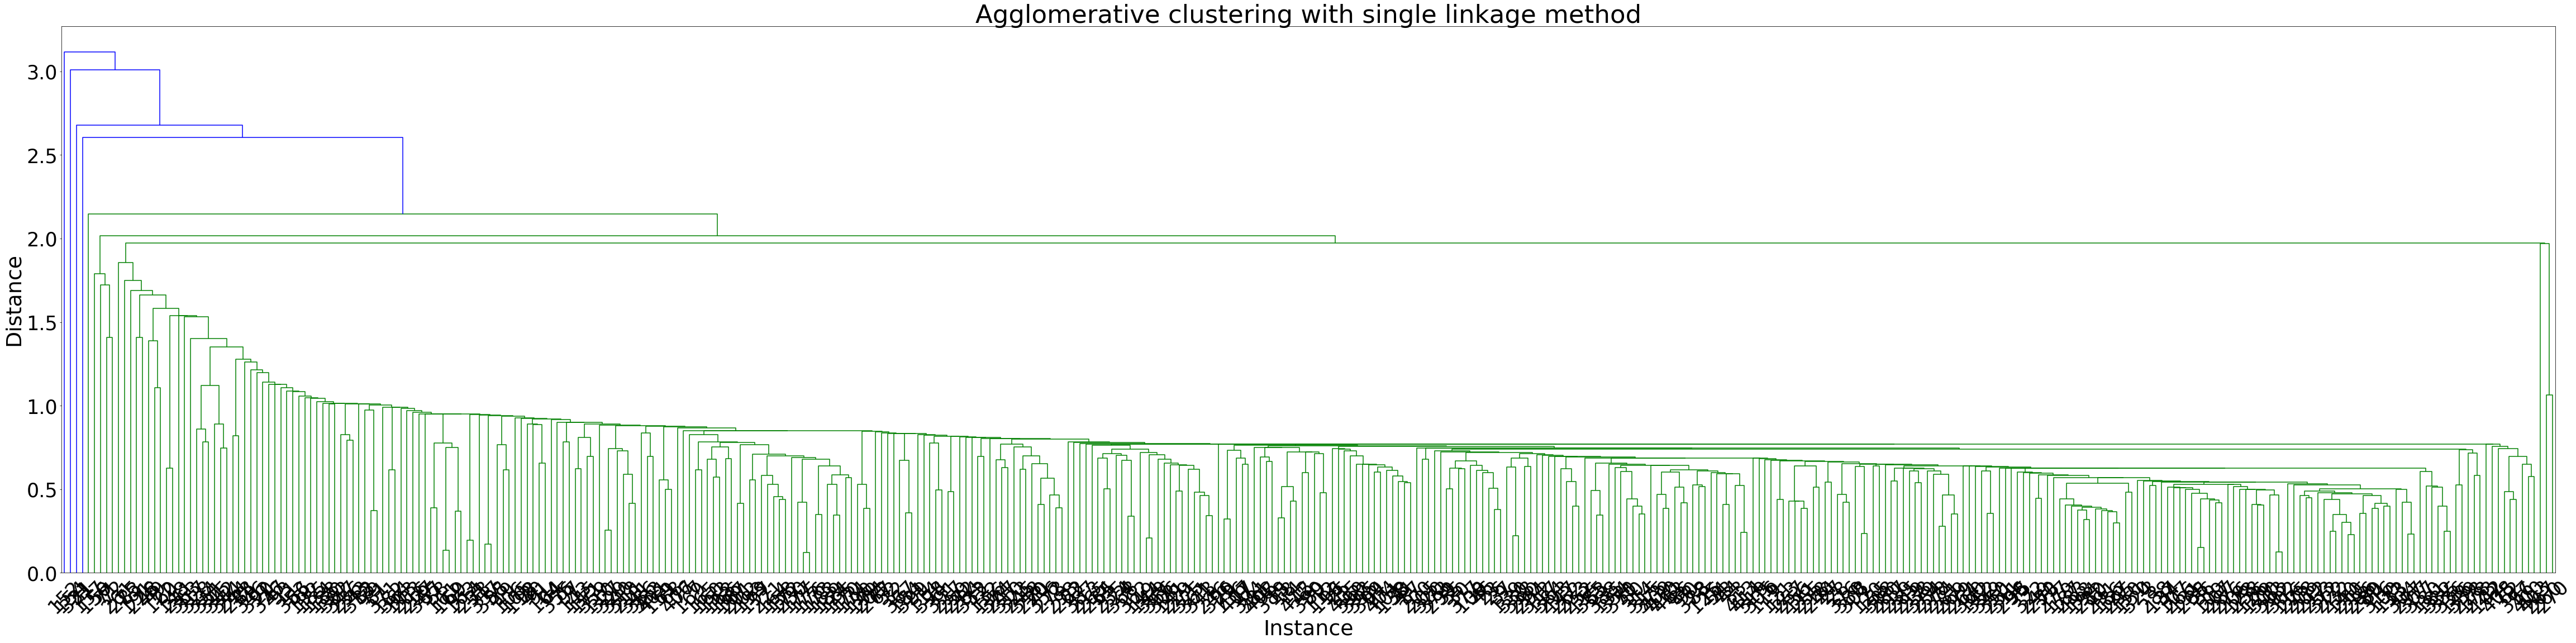

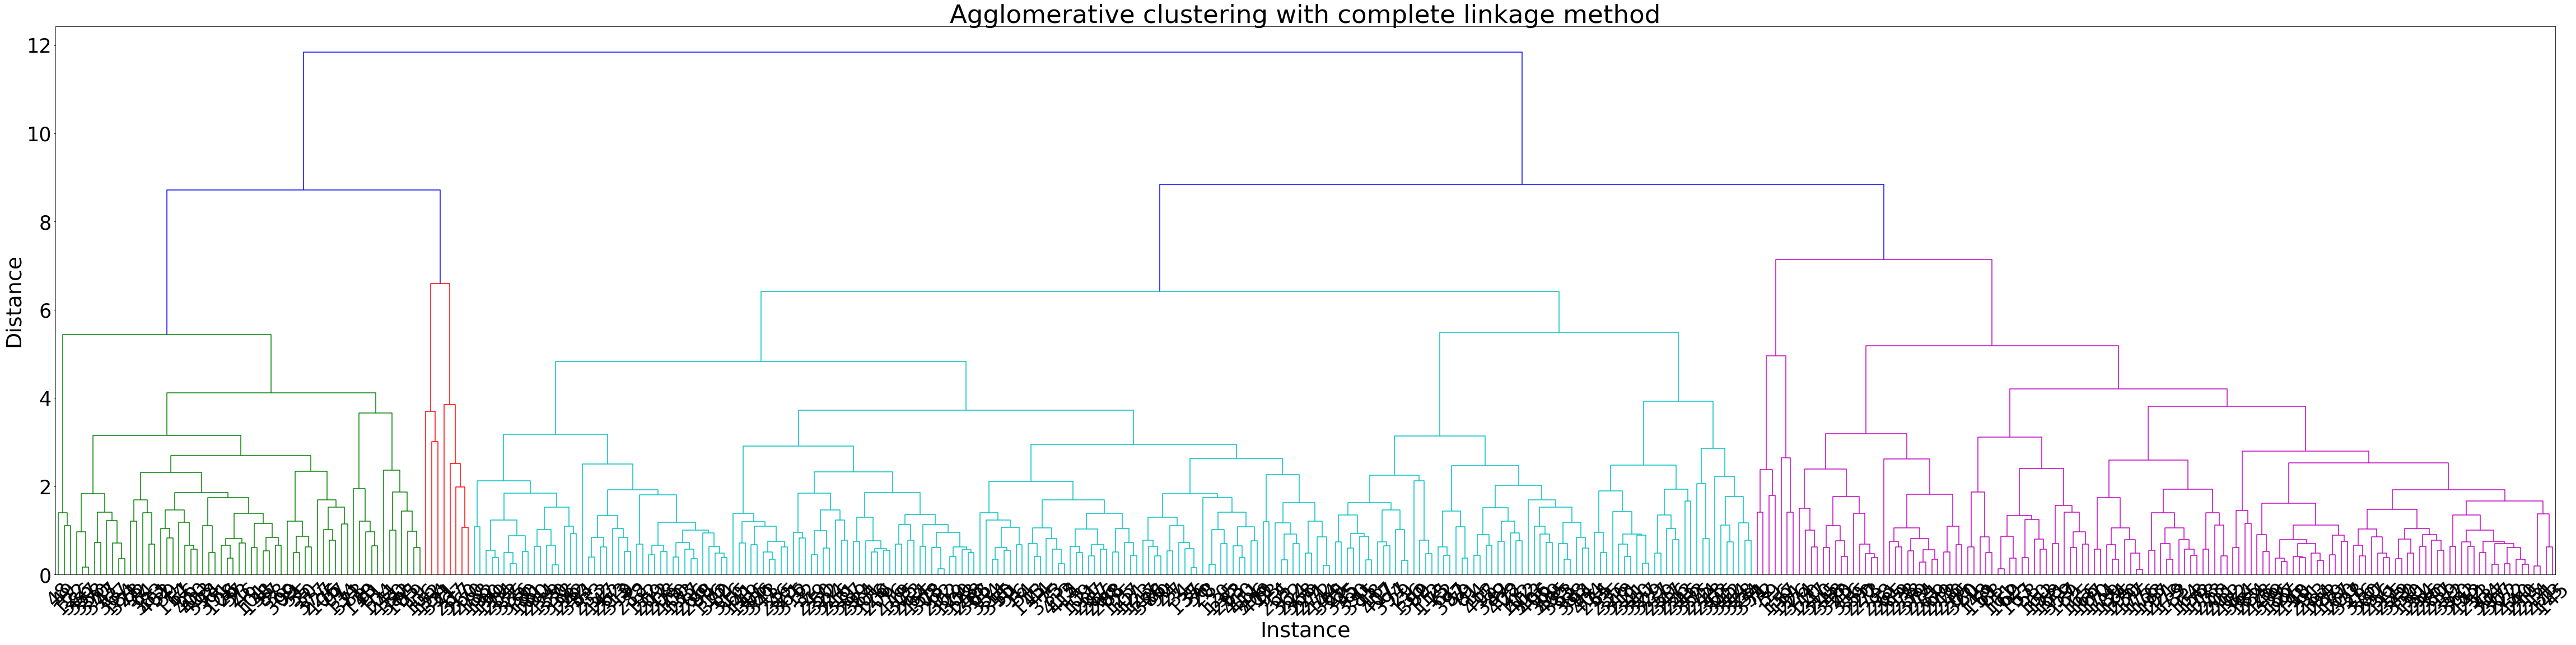

In [13]:
#since we have hundreds of data points with more than 2 dimensions
#therefore dendrograms in hierarchical clustering allow easy visualisation of the clusters

#plotting single linkage dendrogram
fig = plt.figure(figsize=(80,18))
plt.title("Agglomerative clustering with single linkage method", size=45)
single = linkage(scaled_data, 'single') 
dendrogram(single, leaf_rotation=45., show_contracted=True)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.tick_params(axis='both', which='minor', labelsize=35)
plt.xlabel('Instance', size=38)
plt.ylabel('Distance', size=38)
plt.show()

#plotting complete linkage dendrogram
fig = plt.figure(figsize=(80,18))
plt.title("Agglomerative clustering with complete linkage method", size=45)
complete = linkage(scaled_data, 'complete') 
dendrogram(complete, leaf_rotation=45., show_contracted=True)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.tick_params(axis='both', which='minor', labelsize=35)
plt.xlabel('Instance', size=38)
plt.ylabel('Distance', size=38)
plt.show()

### Clustering Visualisation


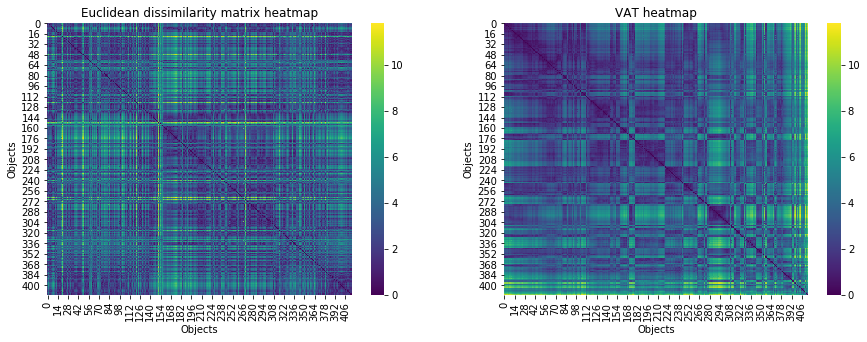

In [25]:
#calculating the euclidean distance dissimilarity matrix 
scaled_data2 = scaled_data.copy()
d = squareform(pdist(scaled_data2, 'euclidean'))

#setting the figure size
fig = plt.figure(figsize=(15,5))

#plotting the heatmapt for dissimilarity matrix
plt.subplot(1, 2, 1)
plt.title("Euclidean dissimilarity matrix heatmap", size=12)
ax=sns.heatmap(d,cmap='viridis')
ax.set(xlabel='Objects', ylabel='Objects')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

#calculating the ordered dissimilarity matrix using the VAT function and plotting the heatmap
plt.subplot(1, 2, 2)
plt.title("VAT heatmap", size=12)
RV, C, I = VAT(scaled_data2)
x=sns.heatmap(RV,cmap='viridis')
x.set(xlabel='Objects', ylabel='Objects')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.show()

### Conclusion

Pearson Correlation shows strong negative linear relationship between socioeconomic disadvantage score 
and health risk factors (smoking, obesity, alcoholism, and mental and behavioral problems). 
Poverty rate and median income also add to this. Relationships are further supported by individual scatter plots, 
proving socioeconomically disadvantaged people have poorer health conditions.
Finding data from same geographical area (SA2) to compare data attribute-wise, removing missing values 
and renaming columns were a challenge during preprocessing. Data had to be merged on a common column name. 
Since most attributes are affected by more than one attribute, it was difficult to find exact correlation between 
two attributes. 
